# **Capstone project: Providing data-driven suggestions for HR**

# **PACE stages**


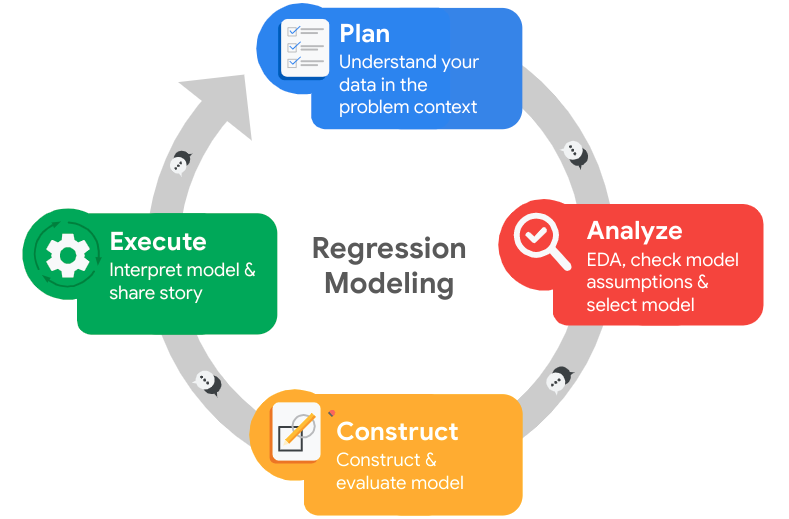

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below.

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [2]:
# Import packages

# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For preprocessing data (Normalize data)
from sklearn.preprocessing import StandardScaler

# For data modeling
from xgboost import XGBClassifier
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, plot_roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

In [5]:


# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head(5)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [6]:
# Gather basic information about the data
df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [7]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [8]:
# Display all column names
all_collumns = df0.columns.tolist()
all_collumns

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'Department',
 'salary']

In [9]:
#Rename columns as need
df0 = df0.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department'})

# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [10]:
# Check for missing values
df0.isnull().sum()


,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_monthly_hours,0
tenure,0
work_accident,0
left,0
promotion_last_5years,0
department,0
salary,0


### Check duplicates

Check for any duplicate entries in the data.

In [11]:
# Check for duplicates
df0.duplicated().sum()


3008

In [12]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head(5)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [13]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

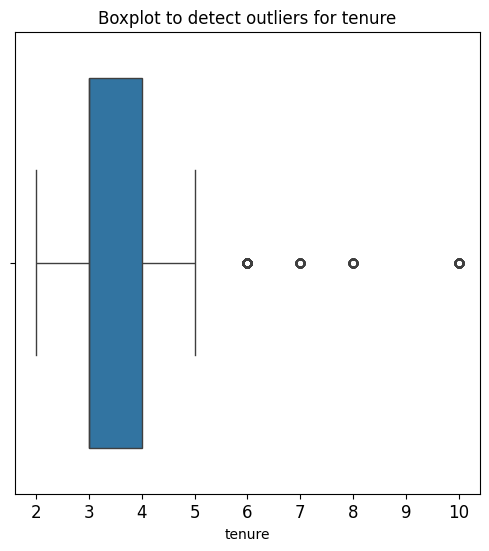

In [14]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for tenure', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df1['tenure'])
plt.show()

In [15]:
# Determine the number of rows containing outliers

# Compute the 25th percentile value in `tenure`
percentile25 = df1['tenure'].quantile(0.25)

# Compute the 75th percentile value in `tenure`
percentile75 = df1['tenure'].quantile(0.75)

# Compute the interquartile range in `tenure`
iqr = percentile75 - percentile25

# Define the upper limit and lower limit for non-outlier values in `tenure`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers in `tenure`
outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]

# Count how many rows in the data contain outliers in `tenure`
print("Number of rows in the data containing outliers in `tenure`:", len(outliers))

Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `tenure`: 824


# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [16]:
print(df1['left'].value_counts())
print()


left
0    10000
1     1991
Name: count, dtype: int64



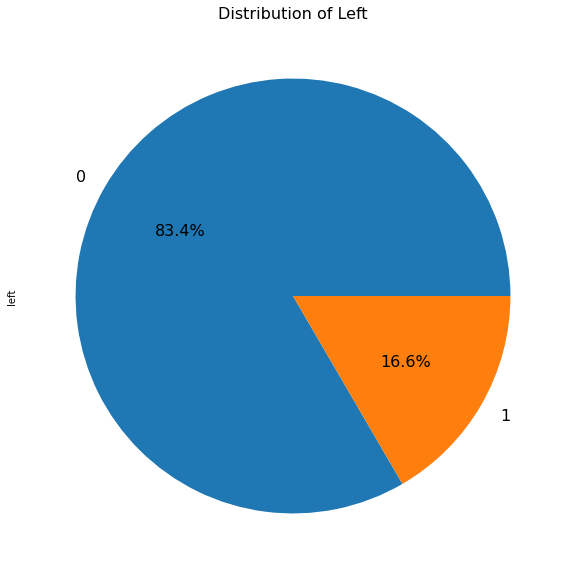

In [ ]:
value_counts = df1['left'].value_counts()

plt.figure(figsize=(10, 10))
value_counts.plot(kind='pie', autopct='%1.1f%%', textprops={'fontsize': 16})
plt.title('Distribution of Left', fontsize=16)
plt.show()

### Data visualizations

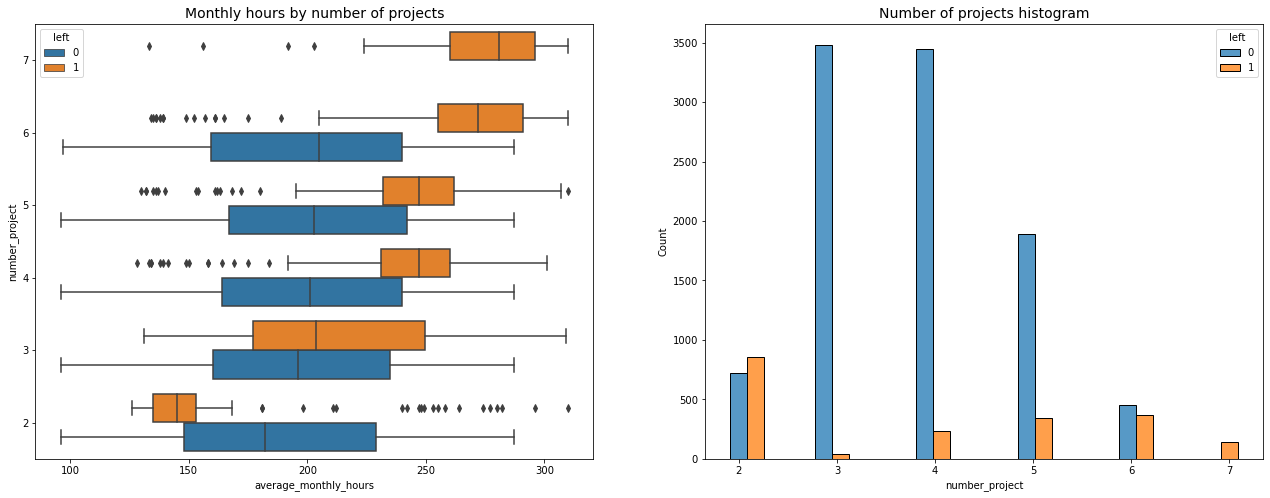

In [ ]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['number_project']
tenure_left = df1[df1['left']==1]['number_project']
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')

# Display the plots
plt.show()

It might be natural that people who work on more projects would also work longer hours. This appears to be the case here, with the mean hours of each group (stayed and left) increasing with number of projects worked. However, a few things stand out from this plot.

1. There are two groups of employees who left the company: (A) those who worked considerably less than their peers with the same number of projects, and (B) those who worked much more. Of those in group A, it's possible that they were fired. It's also possible that this group includes employees who had already given their notice and were assigned fewer hours because they were already on their way out the door. For those in group B, it's reasonable to infer that they probably quit. The folks in group B likely contributed a lot to the projects they worked in; they might have been the largest contributors to their projects.

2. Everyone with seven projects left the company, and the interquartile ranges of this group and those who left with six projects was ~255&ndash;295 hours/month&mdash;much more than any other group.

3. The optimal number of projects for employees to work on seems to be 3&ndash;4. The ratio of left/stayed is very small for these cohorts.

4. If you assume a work week of 40 hours and two weeks of vacation per year, then the average number of working hours per month of employees working Monday&ndash;Friday `= 50 weeks * 40 hours per week / 12 months = 166.67 hours per month`. This means that, aside from the employees who worked on two projects, every group&mdash;even those who didn't leave the company&mdash;worked considerably more hours than this. It seems that employees here are overworked.

In [ ]:
# Get value counts of stayed/left for employees with 7 projects
df1[df1['number_project']==7]['left'].value_counts()

1    145
Name: left, dtype: int64

This confirms that all employees with 7 projects did leave.

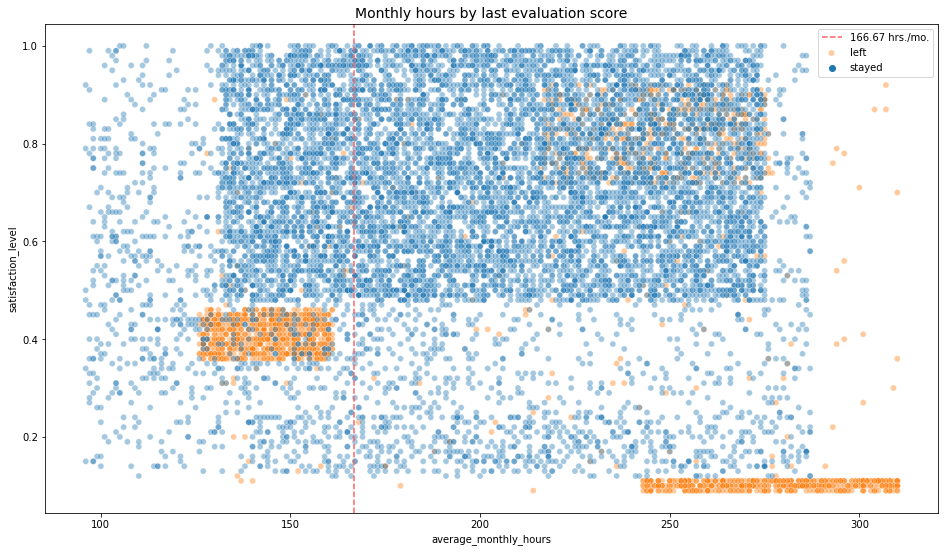

In [ ]:
# Create scatterplot of `average_monthly_hours` versus `satisfaction_level`, comparing employees who stayed versus those who left
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

The scatterplot above shows that there was a sizeable group of employees who worked ~240–315 hours per month. 315 hours per month is over 75 hours per week for a whole year. It's likely this is related to their satisfaction levels being close to zero.

The plot also shows another group of people who left, those who had more normal working hours. Even so, their satisfaction was only around 0.4. It's difficult to speculate about why they might have left. It's possible they felt pressured to work more, considering so many of their peers worked more. And that pressure could have lowered their satisfaction levels.

Finally, there is a group who worked ~210–280 hours per month, and they had satisfaction levels ranging ~0.7–0.9.

Note the strange shape of the distributions here. This is indicative of data manipulation or synthetic data.

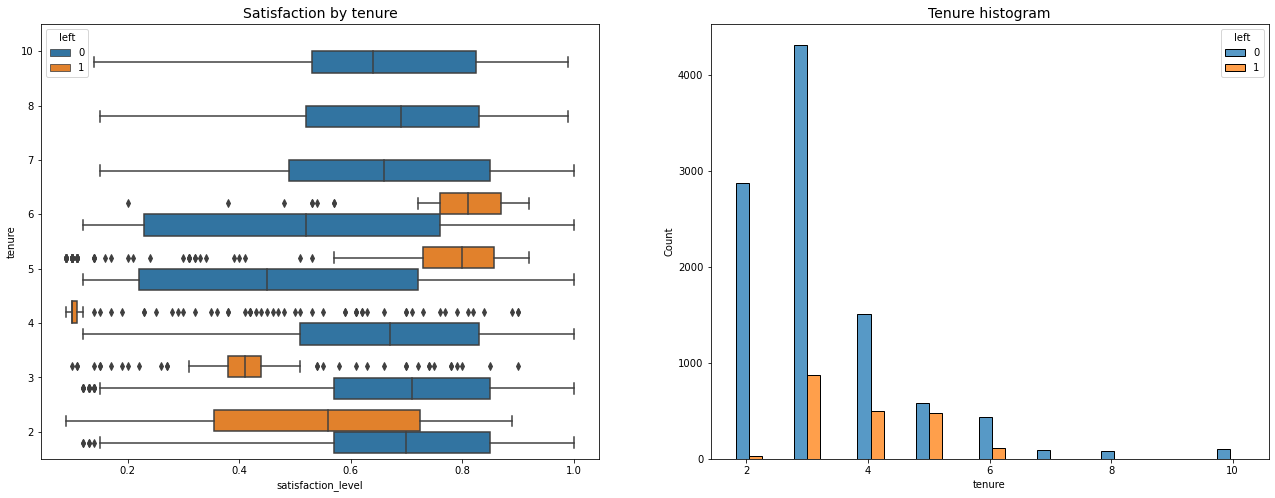

In [ ]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing distributions of `satisfaction_level` by tenure, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize='14')

# Create histogram showing distribution of `tenure`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['tenure']
tenure_left = df1[df1['left']==1]['tenure']
sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Tenure histogram', fontsize='14')

plt.show();

There are many observations you could make from this plot.
- Employees who left fall into two general categories: dissatisfied employees with shorter tenures and very satisfied employees with medium-length tenures.
- Four-year employees who left seem to have an unusually low satisfaction level. It's worth investigating changes to company policy that might have affected people specifically at the four-year mark, if possible.
- The longest-tenured employees didn't leave. Their satisfaction levels aligned with those of newer employees who stayed.
- The histogram shows that there are relatively few longer-tenured employees. It's possible that they're the higher-ranking, higher-paid employees.

In [ ]:
# Calculate mean and median satisfaction scores of employees who left and those who stayed
df1.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


As expected, the mean and median satisfaction scores of employees who left are lower than those of employees who stayed. Interestingly, among employees who stayed, the mean satisfaction score appears to be slightly below the median score. This indicates that satisfaction levels among those who stayed might be skewed to the left.

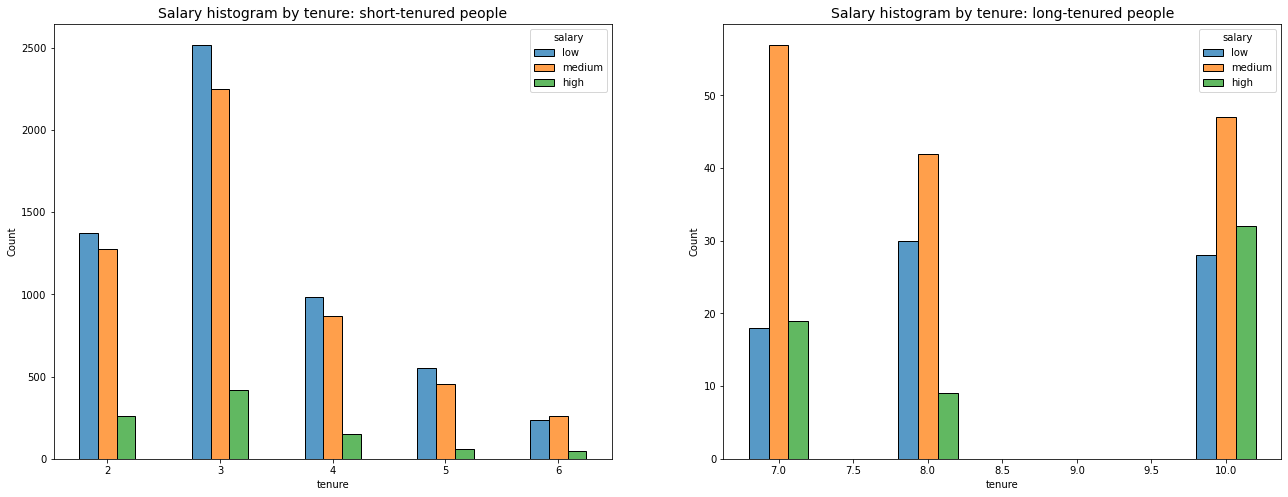

In [ ]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Define short-tenured employees
tenure_short = df1[df1['tenure'] < 7]

# Define long-tenured employees
tenure_long = df1[df1['tenure'] > 6]

# Plot short-tenured histogram
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1,
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')

# Plot long-tenured histogram
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1,
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='14');

The plots above show that long-tenured employees were not disproportionately comprised of higher-paid employees.

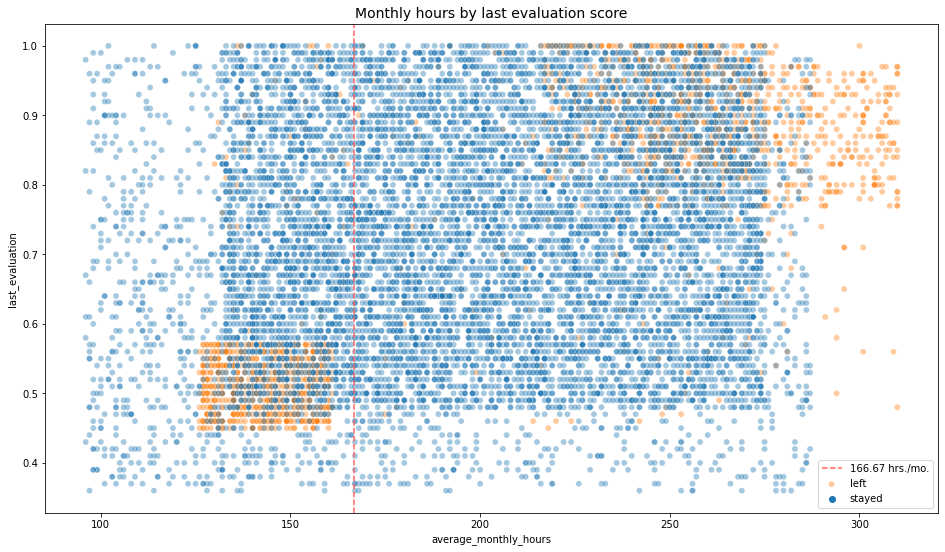

In [ ]:
# Create scatterplot of `average_monthly_hours` versus `last_evaluation`
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

The following observations can be made from the scatterplot above:
- The scatterplot indicates two groups of employees who left: overworked employees who performed very well and employees who worked slightly under the nominal monthly average of 166.67 hours with lower evaluation scores.
- There seems to be a correlation between hours worked and evaluation score.
- There isn't a high percentage of employees in the upper left quadrant of this plot; but working long hours doesn't guarantee a good evaluation score.
- Most of the employees in this company work well over 167 hours per month.

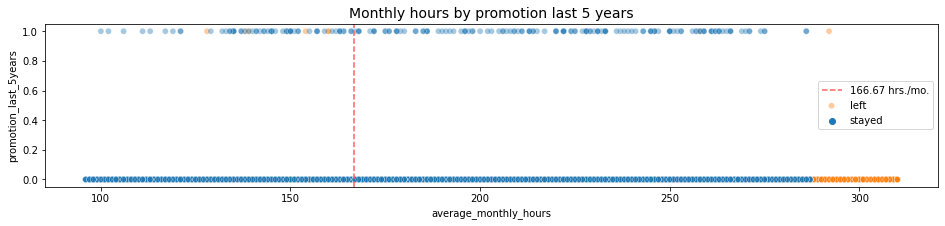

In [ ]:
# Create plot to examine relationship between `average_monthly_hours` and `promotion_last_5years`
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14');

The plot above shows the following:
- Very few employees who were promoted in the last five years left
- Very few employees who worked the most hours were promoted
- All of the employees who left were working the longest hours  

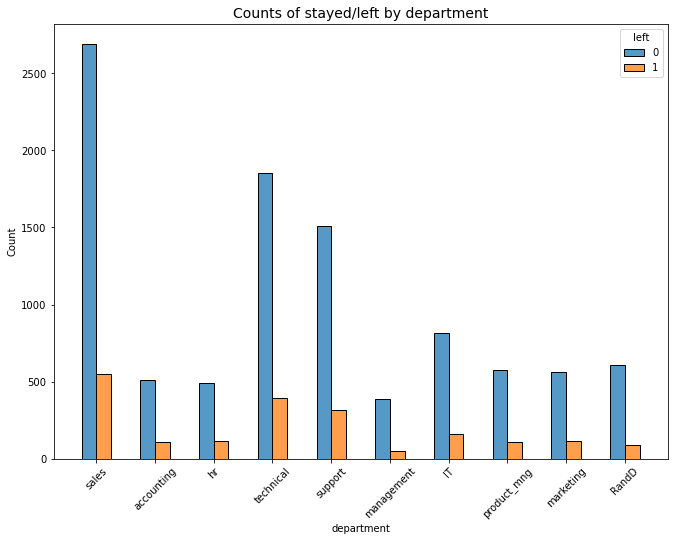

In [ ]:
# Create stacked histogram to compare department distribution of employees who left to that of employees who didn't
plt.figure(figsize=(11,8))
sns.histplot(data=df1, x='department', hue='left', discrete=1,
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation='45')
plt.title('Counts of stayed/left by department', fontsize=14);

There doesn't seem to be any department that differs significantly in its proportion of employees who left to those who stayed.


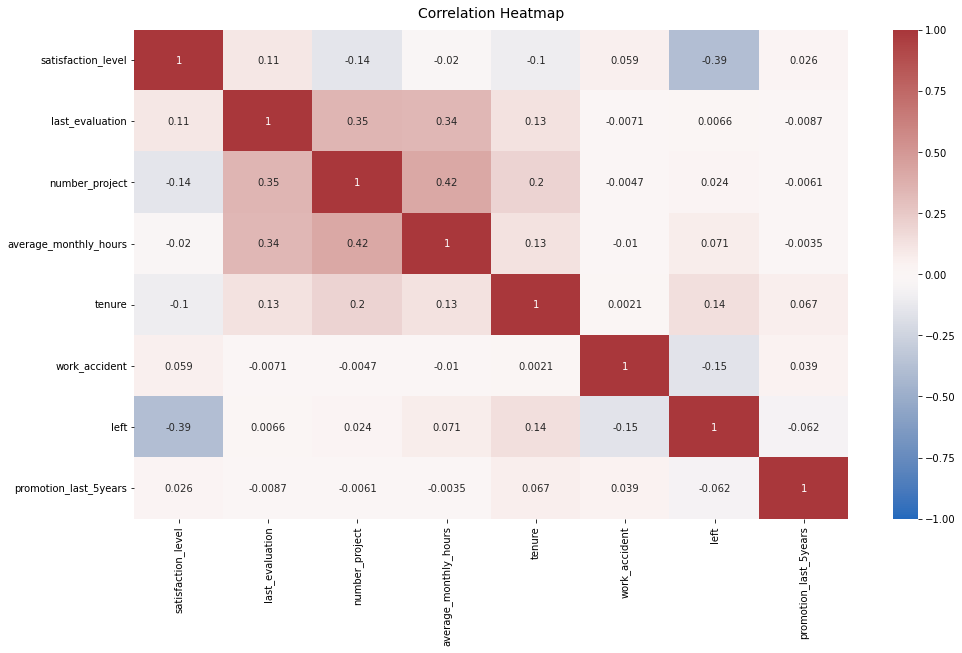

In [ ]:
# Plot a correlation heatmap
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df0.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

The correlation heatmap confirms that the number of projects, monthly hours, and evaluation scores all have some positive correlation with each other, and whether an employee leaves is negatively correlated with their satisfaction level.

### Insights

It appears that employees are leaving the company as a result of poor management. Leaving is tied to longer working hours, many projects, and generally lower satisfaction levels. It can be ungratifying to work long hours and not receive promotions or good evaluation scores. There's a sizeable group of employees at this company who are probably burned out. It also appears that if an employee has spent more than six years at the company, they tend not to leave

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


# Feature engineering

##Feature transfomation

In [ ]:

# Copy the dataframe
df_enc = df1.copy()

# Encode the `salary` column as an ordinal numeric category
df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# Dummy encode the `department` column
df_enc = pd.get_dummies(df_enc, drop_first=False)

# Display the new dataframe
df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


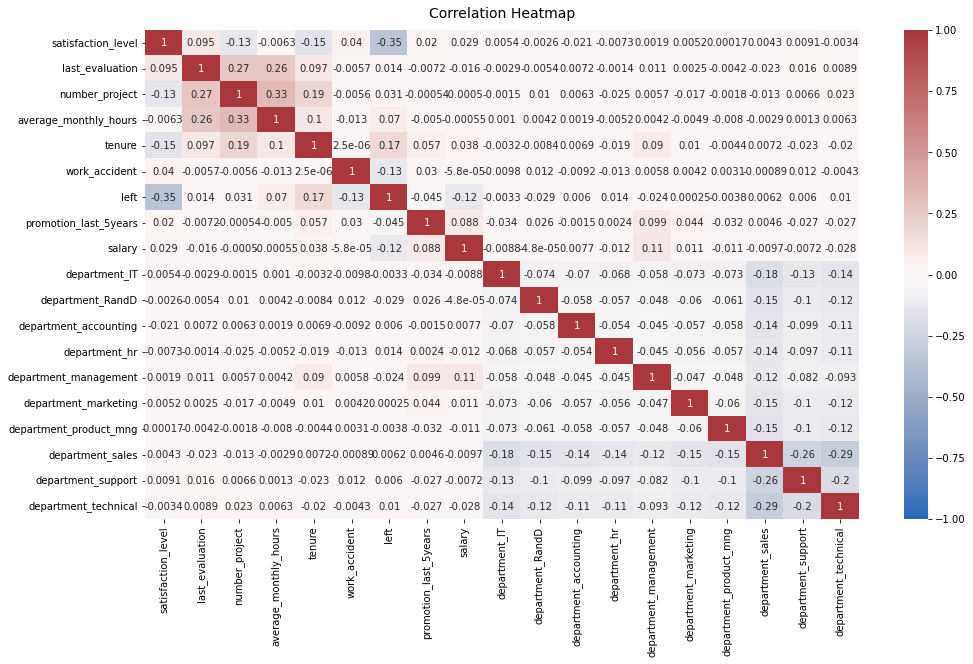

In [ ]:
#Plot a correlation heatmap
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df_enc.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

In [ ]:
# Select rows without outliers in `tenure` and save resulting dataframe in a new variable
df_preprocessed = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]

# Display first few rows of new dataframe
df_preprocessed.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
high_corr = df_enc.corr()['left'].sort_values(ascending=False)
high_corr

left                      1.000000
tenure                    0.173295
average_monthly_hours     0.070409
number_project            0.030928
department_hr             0.013567
last_evaluation           0.013520
department_technical      0.010000
department_sales          0.006154
department_support        0.006019
department_accounting     0.005955
department_marketing      0.000248
department_IT            -0.003324
department_product_mng   -0.003768
department_management    -0.024417
department_RandD         -0.029016
promotion_last_5years    -0.044657
salary                   -0.118882
work_accident            -0.125436
satisfaction_level       -0.350558
Name: left, dtype: float64

## Feature selection

In [ ]:
X = df_preprocessed.drop('left', axis=1)
y = df_preprocessed['left']

In [ ]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

# Modeling


##Logistic Regression

In [ ]:
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

### Define model

In [ ]:
#Define Logistic Regression model
logistic = make_pipeline(StandardScaler(), LogisticRegression())

### Train model

In [ ]:
#Train Logistic model
logistic.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [ ]:
logistic_predictions = logistic.predict(X_test)

# Create classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
logistic_report = classification_report(y_test, logistic_predictions,target_names=target_names)
print(logistic_report)

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.45      0.27      0.34       471

                 accuracy                           0.82      2792
                macro avg       0.66      0.60      0.62      2792
             weighted avg       0.79      0.82      0.80      2792



In [ ]:
logistic_auc_roc = roc_auc_score(y_test, logistic_predictions)
print("AUC-ROC:", logistic_auc_roc)

AUC-ROC: 0.6033364709369177


In [ ]:
def get_metrics_dataframe(model_name, true_labels, predicted_labels,gridsearchcv):
    # Generate classification report
    report = classification_report(true_labels, predicted_labels, output_dict=True)

    # Extract the weighted avg metrics
    weighted_avg_metrics = report['weighted avg']

    # Compute accuracy and add it to the metrics
    accuracy = accuracy_score(true_labels, predicted_labels)
    weighted_avg_metrics['accuracy'] = accuracy

    #Compute AUC-ROC
    if gridsearchcv == None:
        '''auc_roc = roc_auc_score(true_labels, predicted_labels)
        weighted_avg_metrics['auc_roc'] = auc_roc'''


    else:
        weighted_avg_metrics['auc_roc'] = gridsearchcv.best_score_

    # Convert to DataFrame and add the model name
    metrics_df = pd.DataFrame([weighted_avg_metrics])
    metrics_df['model'] = model_name

    # Select only precision, recall, f1-score, accuracy, and model
    metrics_df = metrics_df[['model', 'precision', 'recall', 'f1-score', 'accuracy','auc_roc']]

    return metrics_df

In [ ]:
logistic_result = get_metrics_dataframe("Logistic Regression",y_test,logistic_predictions,None)
logistic_result

,model,precision,recall,f1-score,accuracy,auc_roc
0,Logistic Regression,0.794256,0.821633,0.803127,0.821633,0.603336


### Confusion matrix


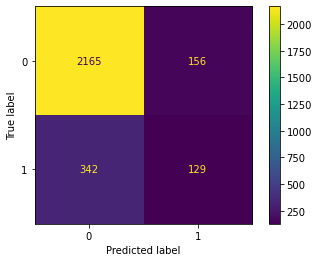

In [ ]:
# Create confusion matrix
logistic_cm = confusion_matrix(y_test, logistic_predictions)

# Create the display for confusion matrix.
logistic_cm_display = ConfusionMatrixDisplay(confusion_matrix = logistic_cm,display_labels = logistic.classes_)

# Plot confusion matrix
logistic_cm_display.plot(values_format='')
plt.show()

##Support Vectoer Machine (SVM)

### Define model

In [ ]:
## SVM
param_grid = {"C": [0.01, 0.1, 1, 10, 100],
              "gamma": ["scale", 0.001, 0.005, 0.1]}

In [ ]:
SVM = make_pipeline(StandardScaler(),
                    GridSearchCV(SVC(),
                    param_grid,
                    cv=10,
                    scoring=scoring,
                    refit='roc_auc',
                    verbose=2))

### Train model

In [ ]:
SVM.fit(X_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV] C=0.01, gamma=scale .............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, gamma=scale, total=   1.3s
[CV] C=0.01, gamma=scale .............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV] .............................. C=0.01, gamma=scale, total=   1.5s
[CV] C=0.01, gamma=scale .............................................
[CV] .............................. C=0.01, gamma=scale, total=   1.4s
[CV] C=0.01, gamma=scale .............................................
[CV] .............................. C=0.01, gamma=scale, total=   1.4s
[CV] C=0.01, gamma=scale .............................................
[CV] .............................. C=0.01, gamma=scale, total=   1.4s
[CV] C=0.01, gamma=scale .............................................
[CV] .............................. C=0.01, gamma=scale, total=   1.4s
[CV] C=0.01, gamma=scale .............................................
[CV] .............................. C=0.01, gamma=scale, total=   1.4s
[CV] C=0.01, gamma=scale .............................................
[CV] .............................. C=0.01, gamma=scale, total=   1.4s
[CV] C=0.01, gamma=scale .............................................
[CV] .

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  3.9min finished


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('gridsearchcv',
                 GridSearchCV(cv=10, error_score=nan,
                              estimator=SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0.001, verbose=False),
                              iid='deprecated', n_jobs=None,
                              param_grid={'C': [0.01, 0.1, 1, 10, 100],
                

In [ ]:
# Access the GridSearchCV object from the pipeline
SVM_grid_search = SVM.named_steps['gridsearchcv']


In [ ]:
SVM_grid_search.best_estimator_

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#Check best hyperparameter
SVM_grid_search.best_params_

{'C': 1, 'gamma': 0.1}

In [ ]:
SVM_predictions = SVM.predict(X_test)

# Create classification report for logistic regression model
print(classification_report(y_test, SVM_predictions,target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.98      0.98      0.98      2321
    Predicted would leave       0.90      0.90      0.90       471

                 accuracy                           0.97      2792
                macro avg       0.94      0.94      0.94      2792
             weighted avg       0.97      0.97      0.97      2792



In [ ]:
SVM_result = get_metrics_dataframe("Support Vector Machine",y_test,SVM_predictions,SVM_grid_search)
SVM_result

,model,precision,recall,f1-score,accuracy,auc_roc
0,Support Vector Machine,0.965616,0.965616,0.965616,0.965616,0.968728


### Confusion matrix

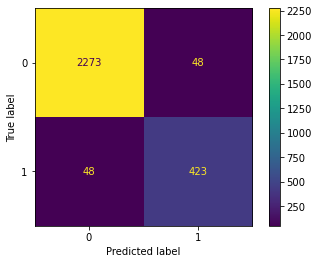

In [ ]:
# Create confusion matrix
SVM_cm = confusion_matrix(y_test, SVM_predictions)

# Create the display for confusion matrix.
SVM_cm_display = ConfusionMatrixDisplay(confusion_matrix = SVM_cm,display_labels = SVM_grid_search.classes_)

# Plot confusion matrix
SVM_cm_display.plot(values_format='')
plt.show()

## Multi-layer Perceptron (MLP)

### Define model

In [ ]:
#Define Multi-Layer Perception
MLP = make_pipeline(StandardScaler(),
                    MLPClassifier(hidden_layer_sizes=(5, ),
                                  activation="logistic",
                                  learning_rate="adaptive",
                                  batch_size=32,
                                  max_iter=200))


### Train model

In [ ]:
#Train MLP
MLP.fit(X_train, y_train)

MLP_predictions = MLP.predict(X_test)

In [ ]:
print(classification_report(y_test, MLP_predictions,target_names=target_names))


                           precision    recall  f1-score   support

Predicted would not leave       0.97      0.97      0.97      2321
    Predicted would leave       0.85      0.84      0.85       471

                 accuracy                           0.95      2792
                macro avg       0.91      0.90      0.91      2792
             weighted avg       0.95      0.95      0.95      2792



In [ ]:
MLP_result = get_metrics_dataframe("Multi-layer Perceptron",y_test,MLP_predictions)
MLP_result

,model,precision,recall,f1-score,accuracy,auc_roc
0,Multi-layer Perceptron,0.94842,0.948782,0.948585,0.948782,0.904887


### Confusion matrix

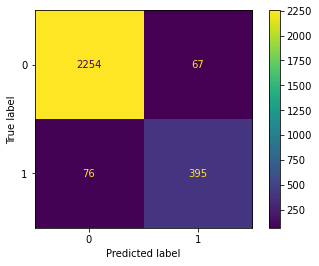

In [ ]:
# Create confusion matrix
MLP_cm = confusion_matrix(y_test, MLP_predictions)

# Create the display for confusion matrix.
MLP_cm_display = ConfusionMatrixDisplay(confusion_matrix = MLP_cm,display_labels = MLP.classes_)

# Plot confusion matrix
MLP_cm_display.plot(values_format='')
plt.show()

## Decision Tree

### Define model

In [ ]:
#Define decision tree
DecisionTree = DecisionTreeClassifier(random_state=0)

In [ ]:
# Define a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

In [ ]:
# Instantiate GridSearch
DecisionTree = GridSearchCV(DecisionTree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

### Train model

In [ ]:
%%time
DecisionTree.fit(X_train, y_train)



CPU times: user 3.03 s, sys: 0 ns, total: 3.03 s
Wall time: 3.03 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                

In [ ]:
# Check best parameters
DecisionTree.best_params_

{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [ ]:
# Check best AUC score on CV
DecisionTree.best_score_

0.9738070859906354

In [ ]:
DecisionTree_predictions = DecisionTree.predict(X_test)

print(classification_report(y_test, DecisionTree_predictions,target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.99      0.99      0.99      2321
    Predicted would leave       0.96      0.93      0.95       471

                 accuracy                           0.98      2792
                macro avg       0.97      0.96      0.97      2792
             weighted avg       0.98      0.98      0.98      2792



In [ ]:
DecisionTree_result = get_metrics_dataframe("Decision Tree",y_test,DecisionTree_predictions)
DecisionTree_result

,model,precision,recall,f1-score,accuracy,auc_roc
0,Decision Tree,0.981958,0.982092,0.981968,0.982092,0.961306


### Confusion matrix


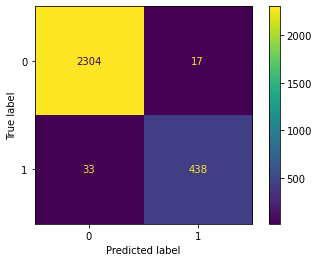

In [ ]:
# Create confusion matrix
DecisionTree_cm = confusion_matrix(y_test, DecisionTree_predictions)

# Create the display for confusion matrix.
DecisionTree_cm_display = ConfusionMatrixDisplay(confusion_matrix = DecisionTree_cm,display_labels = DecisionTree.classes_)

# Plot confusion matrix
DecisionTree_cm_display.plot(values_format='')
plt.show()

The model predicts more false positives than false negatives, which means that some employees may be identified as at risk of quitting or getting fired, when that's actually not the case. But this is still a strong model.

For exploratory purpose, I want to inspect the splits of the decision tree model and the most important features in the random forest model.

### Plot the tree

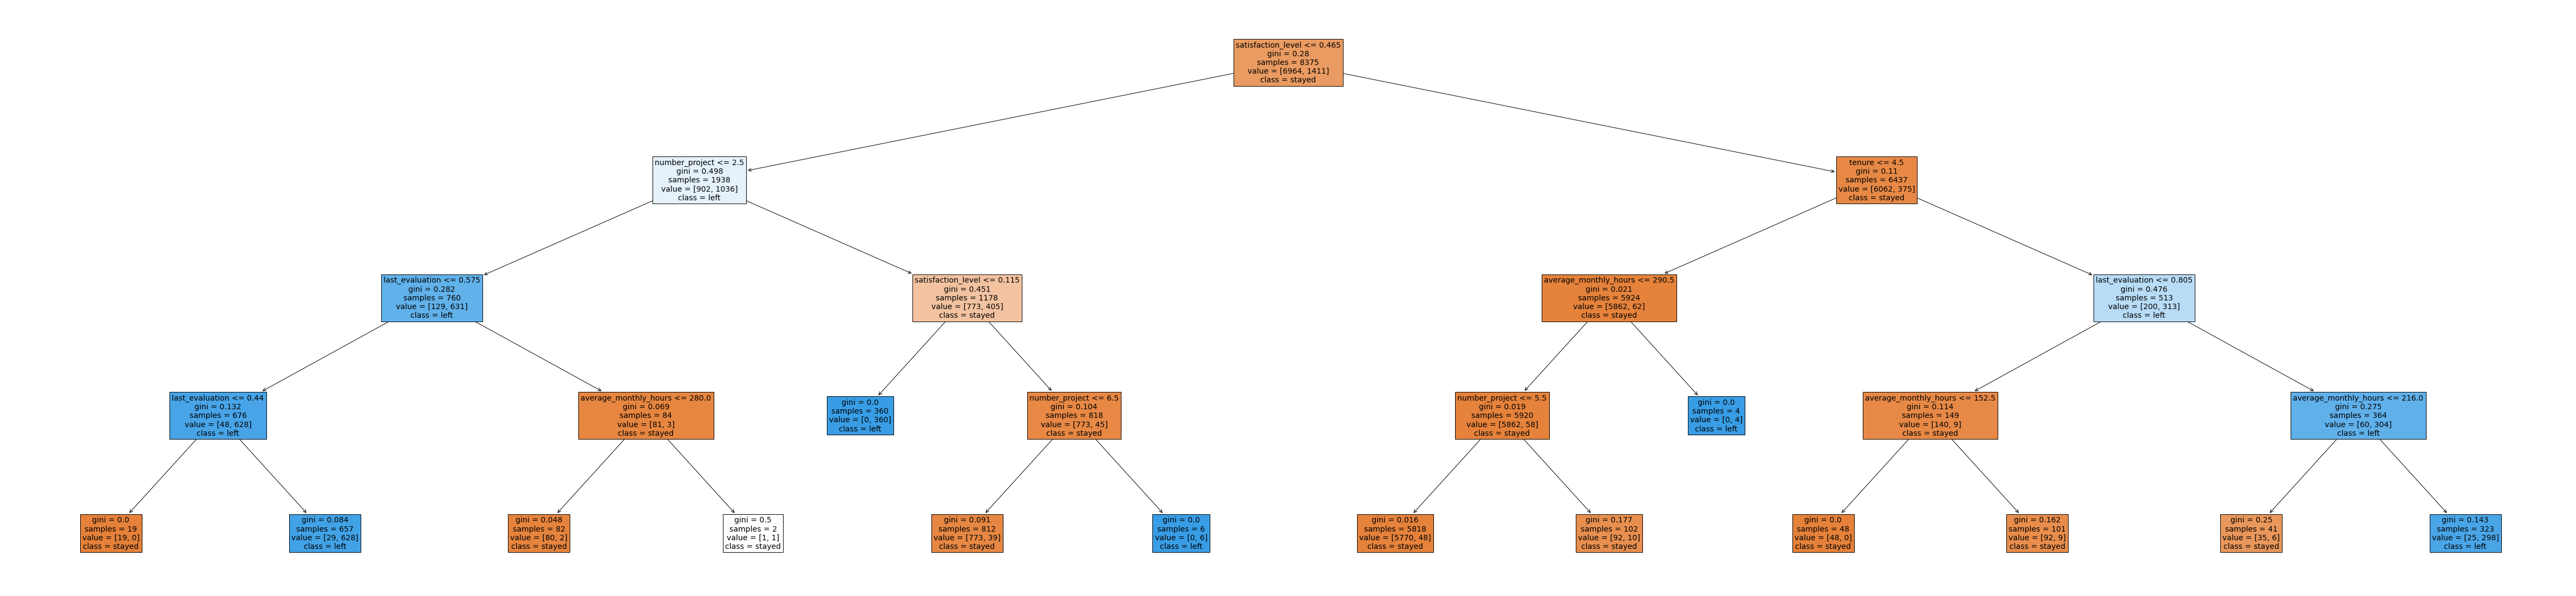

In [ ]:
# Plot the tree
plt.figure(figsize=(85,20))
plot_tree(DecisionTree.best_estimator_, max_depth=5, fontsize=14, feature_names=X.columns,
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

### Feature importance

In [ ]:
DecisionTree_importances = pd.DataFrame(DecisionTree.best_estimator_.feature_importances_,
                                 columns=['gini_importance'],
                                 index=X.columns
                                )
DecisionTree_importances = DecisionTree_importances.sort_values(by='gini_importance', ascending=False)

DecisionTree_importances

,gini_importance
satisfaction_level,0.553990
tenure,0.167601
last_evaluation,0.138160
number_project,0.114046
average_monthly_hours,0.026202
department_hr,0.000000
department_support,0.000000
department_sales,0.000000
department_product_mng,0.000000
department_marketing,0.000000


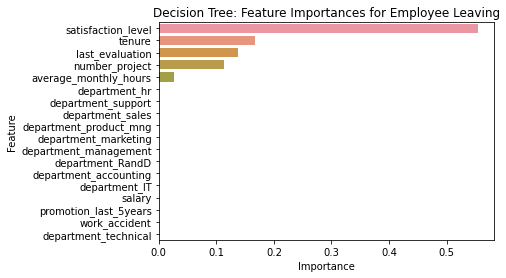

In [ ]:
sns.barplot(data=DecisionTree_importances, x="gini_importance", y=DecisionTree_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()


The barplot above shows that in this decision tree model, `satisfaction_level`, `tenure`, `last_evaluation`, and `number_project` have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, `left`.

## **Random Forest**

### Define model

In [ ]:
## Random Forest
# Instantiate model
RandomForest = RandomForestClassifier(random_state=0)

In [ ]:
# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, 9],
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }

In [ ]:
# Instantiate GridSearch
RandomForest = GridSearchCV(RandomForest, cv_params, scoring=scoring, cv=4, refit='roc_auc')

### Train model

In [ ]:
#Train model
RandomForest.fit(X_train, y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [ ]:
# Check best parameters
RandomForest.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 300}

In [ ]:
# Check best AUC score on CV
RandomForest.best_score_

0.9801962654493814

In [ ]:
RandomForest_predictions = RandomForest.predict(X_test)

print(classification_report(y_test, RandomForest_predictions,target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.99      1.00      0.99      2321
    Predicted would leave       0.98      0.93      0.96       471

                 accuracy                           0.99      2792
                macro avg       0.98      0.96      0.97      2792
             weighted avg       0.99      0.99      0.99      2792



In [ ]:
RandomForest_result = get_metrics_dataframe("Random Forest",y_test,RandomForest_predictions)
RandomForest_result

,model,precision,recall,f1-score,accuracy,auc_roc
0,Random Forest,0.985281,0.985315,0.985154,0.985315,0.963245


### Confusion matrix

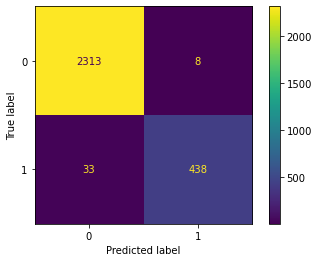

In [ ]:
# Create confusion matrix
RandomForest_cm = confusion_matrix(y_test, RandomForest_predictions)

# Create the display for confusion matrix.
RandomForest_cm_display = ConfusionMatrixDisplay(confusion_matrix = RandomForest_cm,display_labels = RandomForest.classes_)

# Plot confusion matrix
RandomForest_cm_display.plot(values_format='')
plt.show()

### Feature importance

In [ ]:
RandomForest_importances = pd.DataFrame(RandomForest.best_estimator_.feature_importances_,
                                 columns=['gini_importance'],
                                 index=X.columns
                                )
RandomForest_importances = RandomForest_importances.sort_values(by='gini_importance', ascending=False)

RandomForest_importances

,gini_importance
satisfaction_level,0.526742
tenure,0.163030
number_project,0.135697
last_evaluation,0.122374
average_monthly_hours,0.050575
salary,0.000511
department_technical,0.000396
department_IT,0.000139
department_accounting,0.000136
department_support,0.000134


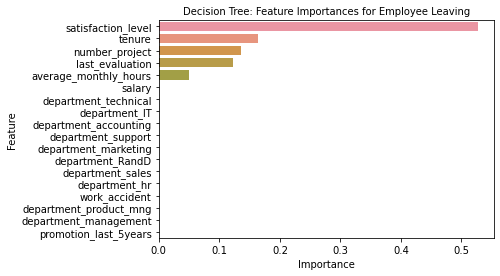

In [ ]:
sns.barplot(data=RandomForest_importances, x="gini_importance", y=RandomForest_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=10)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()


The barplot above shows that in this decision tree model, `satisfaction_level`, `tenure`, `number_project` and `last_evaluation` have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, `left`.

##**XGB CLassifier**

### Define model

In [ ]:
## XGBClassifier

# Define XGBClassifier.model
XGB = XGBClassifier(objective='binary:logistic', random_state=0)

### Train model

In [ ]:
XGB.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [ ]:
XGB_predictions = XGB.predict(X_test)

print(classification_report(y_test, XGB_predictions,target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.99      1.00      0.99      2321
    Predicted would leave       0.98      0.94      0.96       471

                 accuracy                           0.99      2792
                macro avg       0.98      0.97      0.97      2792
             weighted avg       0.99      0.99      0.99      2792



In [ ]:
XGB_auc_roc = roc_auc_score(y_test, XGB_predictions)
print("AUC-ROC:", XGB_auc_roc)

AUC-ROC: 0.9659986223816331


In [ ]:
XGB_result = get_metrics_dataframe("Gradient Boosting Classifier",y_test,XGB_predictions)
XGB_result

,model,precision,recall,f1-score,accuracy,auc_roc
0,Gradient Boosting Classifier,0.985606,0.985673,0.985549,0.985673,0.965999


### Confusion matrix

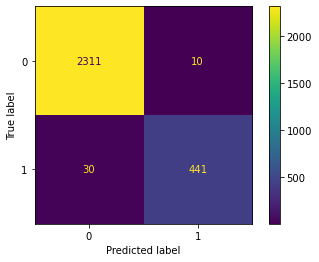

In [ ]:
# Create confusion matrix
XGB_cm = confusion_matrix(y_test, XGB_predictions)

# Create the display for confusion matrix.
XGB_cm_display = ConfusionMatrixDisplay(confusion_matrix = XGB_cm,display_labels = XGB.classes_)

# Plot confusion matrix
XGB_cm_display.plot(values_format='')
plt.show()

### Feature importance

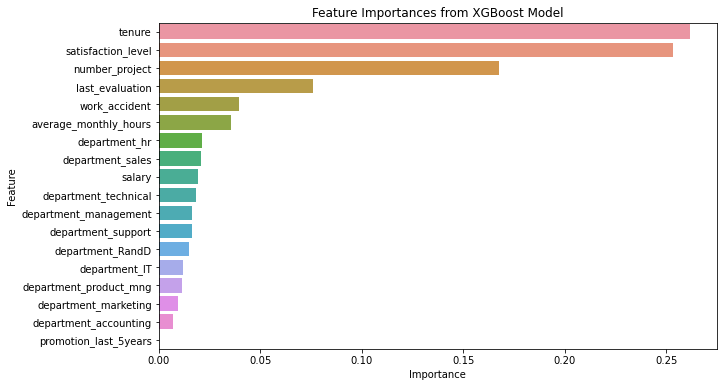

In [ ]:

importances  = XGB.feature_importances_

features = X.columns  # Assuming X is a DataFrame

# Create a DataFrame for visualization
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances from XGBoost Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

The plot above shows that in this model, `tenure`,`satisfaction_level`, `number_project`,  and `last_evaluation` have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, `left`

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






## Summary of model results

In [ ]:

results = [logistic_result, SVM_result, MLP_result, DecisionTree_result, RandomForest_result, XGB_result]


final_result = pd.concat(results, ignore_index=True)
final_result


,model,precision,recall,f1-score,accuracy,auc_roc
0,Logistic Regression,0.794256,0.821633,0.803127,0.821633,0.603336
1,Support Vector Machine,0.965616,0.965616,0.965616,0.965616,0.938704
2,Multi-layer Perceptron,0.948420,0.948782,0.948585,0.948782,0.904887
3,Decision Tree,0.981958,0.982092,0.981968,0.982092,0.961306
4,Random Forest,0.985281,0.985315,0.985154,0.985315,0.963245
5,Gradient Boosting Classifier,0.985606,0.985673,0.985549,0.985673,0.965999


Best model for this dataset is **Gradient Boosting Classifier**
- Precision: 0.99
- Recall: 0.99
- F1 score: 0.99
- Accuracy: 0.99
- AUC-ROC: 0.97



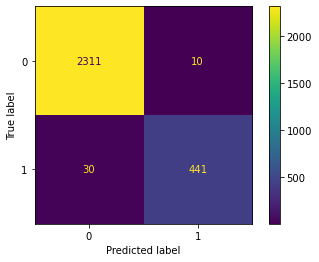

In [ ]:
# Plot XGB's confusion matrix
XGB_cm_display.plot(values_format='')
plt.show()

The **Gradient Boosting Classifier** predicts more false positives than false negatives, which means that some employees may be identified as at risk of quitting or getting fired, when that's actually not the case. This model outperforms all other models in predicting the **False Positive** score (30), minimizing prediction risk. So this is still a strong model.

All tree-based models consistently highlight features `tenure`,`satisfaction_level`, `number_project`,  and `last_evaluation` as key factors influencing an employee's decision to leave their job

### Conclusion, Recommendations, Next Steps

The models and the feature importances extracted from the models confirm that employees at the company are overworked.

To retain employees, the following recommendations could be presented to the stakeholders:

* Cap the number of projects that employees can work on.
* Consider promoting employees who have been with the company for atleast four years, or conduct further investigation about why four-year tenured employees are so dissatisfied.
* Either reward employees for working longer hours, or don't require them to do so.
* If employees aren't familiar with the company's overtime pay policies, inform them about this. If the expectations around workload and time off aren't explicit, make them clear.
* Hold company-wide and within-team discussions to understand and address the company work culture, across the board and in specific contexts.
* High evaluation scores should not be reserved for employees who work 200+ hours per month. Consider a proportionate scale for rewarding employees who contribute more/put in more effort.

**Next Steps**

It may be justified to still have some concern about data leakage. It could be prudent to consider how predictions change when `last_evaluation` is removed from the data. It's possible that evaluations aren't performed very frequently, in which case it would be useful to be able to predict employee retention without this feature. It's also possible that the evaluation score determines whether an employee leaves or stays, in which case it could be useful to pivot and try to predict performance score. The same could be said for satisfaction score.

For another project, you could try building a K-means model on this data and analyzing the clusters. This may yield valuable insight.